In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [7]:
#running SQL
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
# Join data with SQL
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [11]:
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [12]:
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [14]:
#create additional day, month, month number and year fields
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_num,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11,2021
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,Friday,November,11,2021
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,Thursday,November,11,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11,2021


Dear Data Analyst,

At the end of this year, the company will provide prizes for customers who win the Year-End Festival competition. The Marketing team needs help to determine the approximate prize that will be given to the winner of the competition. The prize will be taken from the TOP 5 Products from the Mobiles & Tablets Category during 2022, with the highest number of sales quantity (valid = 1).

Please help, to send the data before the end of this month to the Marketing Team. We would like to thank you for your assistance.

Regards

Marketing Team

<ipython-input-37-565b5c6a7325>:25: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  data1.plot(x='sku_name',


<Axes: title={'center': 'TOP 5 Product'}, xlabel='Quantity', ylabel='Product Name'>

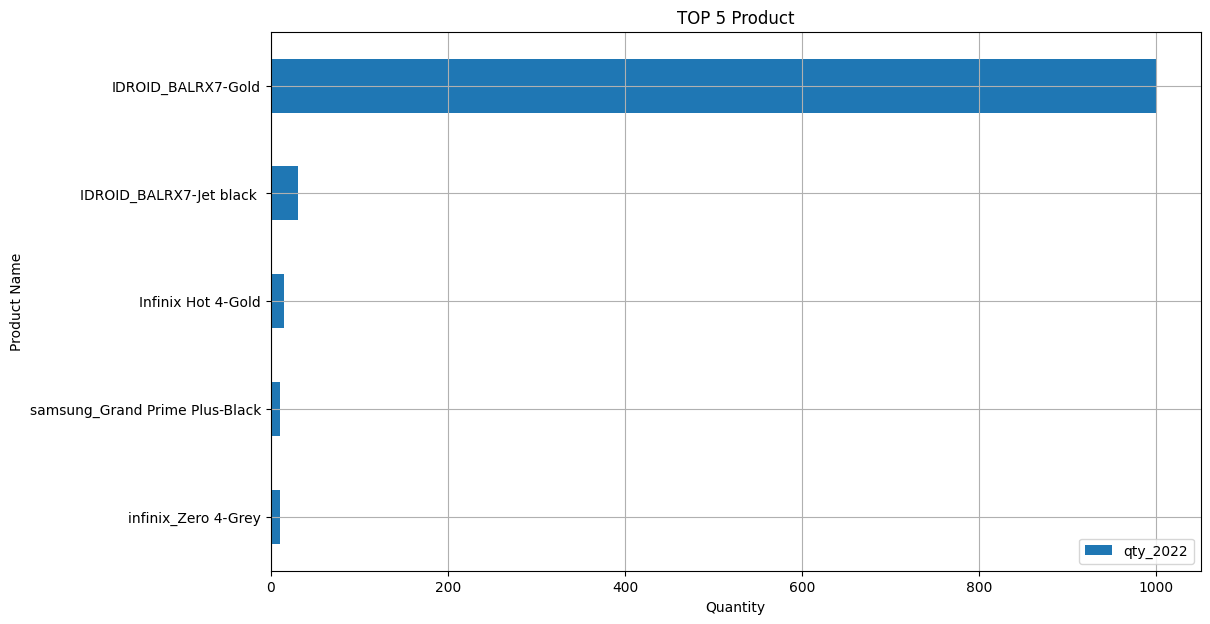

In [37]:
#saving data in the data frame
data1 = pd.DataFrame(
                      #filtering data
                      df[(df['category'] == 'Mobiles & Tablets') &
                         (df['year'] == 2022) &
                         (df['is_valid'] == 1)]
                      #grouping data
                      .groupby(by=["sku_name"])["qty_ordered"]
                      #grouping by sum
                      .sum()
                      #sorting data
                      .sort_values(ascending=False)
                      #reset header name
                      .reset_index(name='qty_2022')
                      #take the top 5 prouct
                      .head()
                    )
#sort data to be used as a chart
data1.sort_values(\
                  by=['qty_2022'], \
                  ascending=True,\
                  inplace=True)

#make a chart
data1.plot(x='sku_name',
           y='qty_2022',
           kind='barh',
           grid = True,
           xlabel = 'Quantity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Product',
           table = False,
           sort_columns = False,
           secondary_y = False)

1. The product IDROID_BALRX7-Gold is definitely the star performer with a very high number of sales. There may be other features or factors that make this product highly desirable to customers.
The Marketing team can focus on promoting or developing the IDROID_BALRX7-Gold product to increase profits further.

2. Although IDROID_BALRX7-Jet black has lower sales, it is still significant. There may be opportunities to improve the marketing or promotion of this product.

3. Infinix Hot 4-Gold and samsung_Grand Prime Plus-Black products still have good contributions, but may need more intensive marketing strategies to increase sales.

4. Infinix_Zero 4-Grey, may require further evaluation to understand the cause of lower sales and determine if there is an opportunity to increase them.

Dear Data Analyst,

Following up on the joint meeting of the Werehouse Team and the Marketing Team, we found that there is still a lot of stock availability of products with the Others Category at the end of 2022.

1. Please help us to check the sales data of this category with 2021 in terms of sales quantity. Our suspicion is that there has been a decrease in sales quantity in 2022 compared to 2021. (Please also show the data of all 15 categories)

2. If there is indeed a decrease in the sales quantity of Others category, please provide us with data on the TOP 20 product names that experienced the highest decrease in 2022 when compared to 2021. We will use this as a discussion material at the next meeting.
Please help to send the data no later than 4 days from today. We thank you for your assistance.

Regards

Tim Werehouse

## Sales data of others category in 2021 by sales quantity ##

In [17]:
#saving data in the data frame
data2 = pd.DataFrame(
                      #filtering data
                      df[(df['is_valid'] == 1) &
                         (df['year'] == 2021)]
                      #grouping data
                      .groupby(by=["category"])["qty_ordered"]
                      #grouping by sum
                      .sum()
                      #sorting data
                      .sort_values(ascending=False)
                      #reset header name
                      .reset_index(name='qty_2021')
                    )
data2

,category,qty_2021
0,Soghaat,759
1,Others,426
2,Superstore,327
3,Men Fashion,237
4,Home & Living,193
5,School & Education,184
6,Health & Sports,173
7,Books,171
8,Kids & Baby,170
9,Beauty & Grooming,168


In [18]:
#saving data in the data frame
data3 = pd.DataFrame(
                      #filtering data
                      df[(df['is_valid'] == 1) &
                         (df['year'] == 2022)]
                      #grouping data
                      .groupby(by=["category"])["qty_ordered"]
                      #grouping by sum
                      .sum()
                      #sorting data
                      .sort_values(ascending=False)
                      #reset header name
                      .reset_index(name='qty_2022')
                    )
data3

,category,qty_2022
0,Mobiles & Tablets,1154
1,Soghaat,612
2,Superstore,536
3,Women Fashion,489
4,Others,263
5,Home & Living,250
6,School & Education,237
7,Kids & Baby,227
8,Health & Sports,200
9,Books,195


In [19]:
#merge 2 dataframe
data4 = data2.merge(data3, left_on = 'category', right_on = 'category')

#growth or comparison of 2021 and 2022
data4['qty_growth']=data4['qty_2022']-data4['qty_2021']
data4.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data4


,category,qty_2021,qty_2022,qty_growth
1,Others,426,263,-163
0,Soghaat,759,612,-147
3,Men Fashion,237,175,-62
9,Beauty & Grooming,168,153,-15
7,Books,171,195,24
11,Appliances,124,148,24
6,Health & Sports,173,200,27
12,Computing,109,153,44
5,School & Education,184,237,53
4,Home & Living,193,250,57


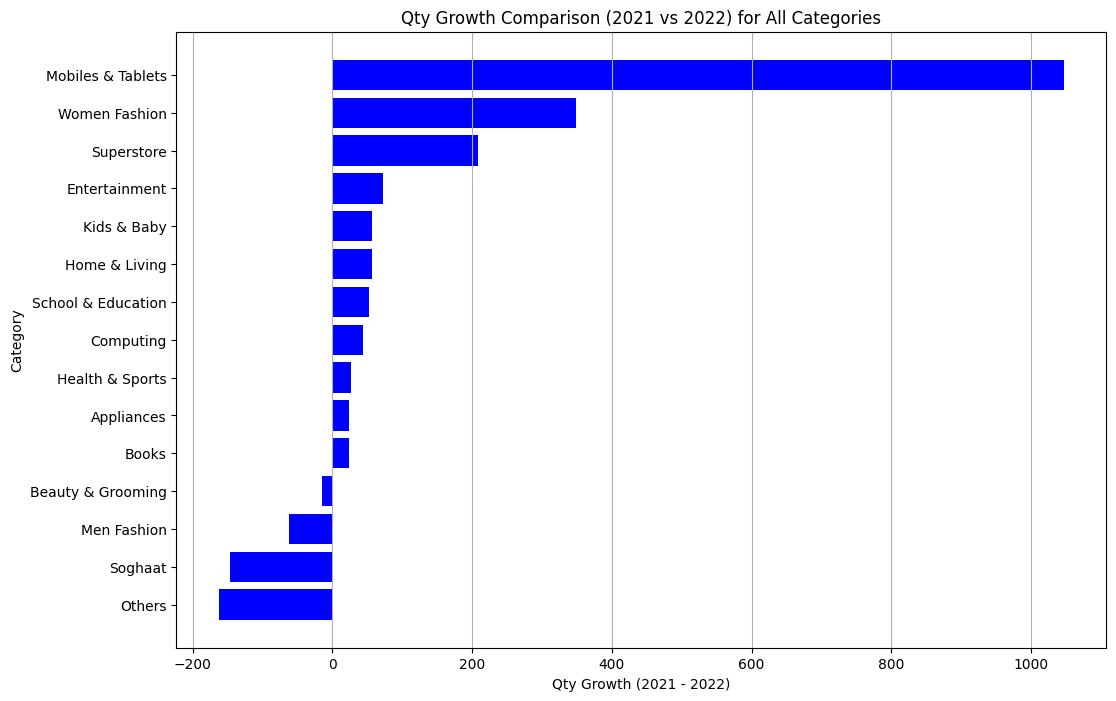

In [53]:
# Plot bar
plt.figure(figsize=(12, 8))
plt.barh(data4['category'], data4['qty_growth'], color='blue')
plt.xlabel('Qty Growth (2021 - 2022)')
plt.ylabel('Category')
plt.title('Qty Growth Comparison (2021 vs 2022) for All Categories')
plt.grid(axis='x')
plt.show()


1. "Others" category experienced a significant decrease in sales from 2021 to 2022 of 163 units. An in-depth evaluation is needed to understand the causes of this decline, such as changes in consumer trends, market competition, or changes in marketing strategies.

2. Excellent Growth in Women Fashion and Mobiles & Tablets showed very high growth. Further focus on product development and marketing in these categories could have a positive impact on overall sales.

3. Categories such as Soghaat and Men Fashion also saw a decline in sales.
There may be a trend of changing customer tastes or increased competition in these categories, which requires marketing strategies or product adjustments.

4. Importance of Understanding Consumer Trends. The analysis of changes in sales quantity proves the importance of a deep understanding of consumer trends.

5. Warehouse teams need to ensure sufficient stock to cope with potential sales spikes in categories experiencing significant growth.
Good stock planning and close co-operation between the Warehouse and Marketing teams is essential.

6. Each category has different sales characteristics, which requiring a customised marketing strategy.


## Top 20 product names that experienced the highest decrease in 2022 when compared to 2021 ##

In [20]:
data5 = pd.DataFrame(
                      #filtering data
                      df[(df['is_valid'] == 1) &
                         (df['category'] == 'Others')&
                         (df['year'] == 2021)]
                      #grouping data
                      .groupby(by=["sku_name"])["qty_ordered"]
                      #grouping by sum
                      .sum()
                      #sorting data
                      .sort_values(ascending=False)
                      #reset header name
                      .reset_index(name='qty_2021')
                    )
data5

,sku_name,qty_2021
0,RB_Dettol Germ Busting Kit-bf,200
1,Telemall_MM-DR-HB-L,23
2,Dawlance_MD 10 + DWB 600,23
3,iu_Tickets General Enclosure-Islamabad,20
4,RS_Rehmat-e-Shereen Mix Mithai,13
...,...,...
82,MEGUIAR_G13115,1
83,MEGUIAR_G12718,1
84,MEGUIAR_G10307,1
85,MEGUIAR_A2116,1


In [21]:
data6 = pd.DataFrame(
                      #filtering data
                      df[(df['is_valid'] == 1) &
                         (df['category'] == 'Others')&
                         (df['year'] == 2022)]
                      #grouping data
                      .groupby(by=["sku_name"])["qty_ordered"]
                      #grouping by sum
                      .sum()
                      #sorting data
                      .sort_values(ascending=False)
                      #reset header name
                      .reset_index(name='qty_2022')
                    )
data6

,sku_name,qty_2022
0,RB_Dettol Germ Busting Kit-bf,45
1,emart_Tyre Shape Air Compressor,34
2,SKMT_Medicine,20
3,shoppers stop_MagicGlass-3,13
4,TCF_Educate-a-Child-for-a-Month,8
...,...,...
94,Z&A_ZEES-0122,1
95,Kansai_High Heat Auto _ Aluminium,1
96,audionic_Shock-2,1
97,Kansai_Auto_Camouflag_Olive,1


In [22]:
#merge data
data7 = data5.merge(data6, how='outer')
data7.fillna(0, inplace=True)
data7['qty_growth']=data7['qty_2022']-data7['qty_2021']
data7.sort_values(by=['qty_growth'],ascending=True,inplace=True)
data7 = data7.head(20)
data7

,sku_name,qty_2021,qty_2022,qty_growth
0,RB_Dettol Germ Busting Kit-bf,200.0,45.0,-155.0
2,Dawlance_MD 10 + DWB 600,23.0,0.0,-23.0
1,Telemall_MM-DR-HB-L,23.0,2.0,-21.0
3,iu_Tickets General Enclosure-Islamabad,20.0,0.0,-20.0
4,RS_Rehmat-e-Shereen Mix Mithai,13.0,0.0,-13.0
5,kansai_NeverWet,10.0,1.0,-9.0
6,sindbad_Sindbad Gift Card-3,7.0,0.0,-7.0
7,emart_00-1,7.0,1.0,-6.0
8,Vouch 365 2016,5.0,0.0,-5.0
10,Am-PTV_ATS-004-M,5.0,0.0,-5.0


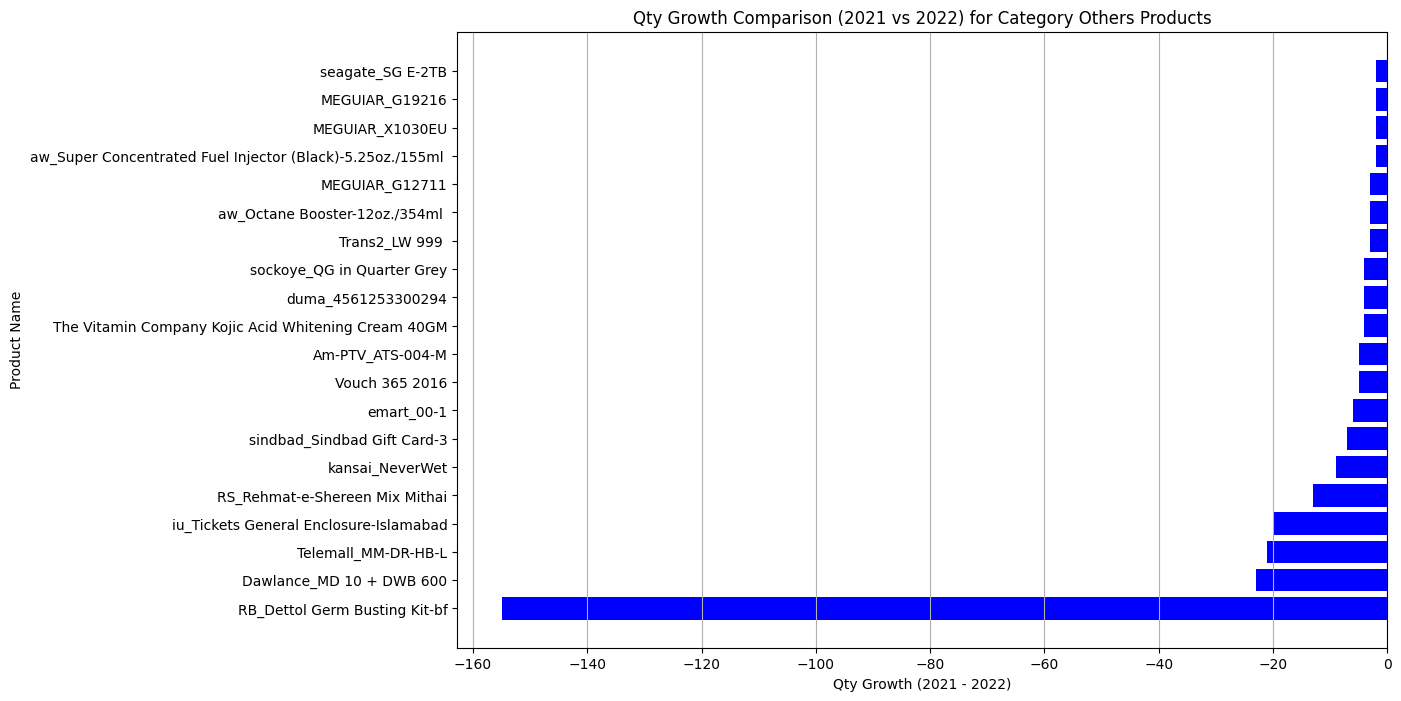

In [52]:
# Plot bar untuk seluruh data
plt.figure(figsize=(12, 8))
plt.barh(data7['sku_name'], data7['qty_growth'], color='blue')
plt.xlabel('Qty Growth (2021 - 2022)')
plt.ylabel('Product Name')
plt.title('Qty Growth Comparison (2021 vs 2022) for Category Others Products')
plt.grid(axis='x')

# Tampilkan plot
plt.show()


1. Products with a significant decline in sales require special attention in analysing the cause of the decline.

2. It may be necessary to evaluate product quality, marketing strategies, or changes in consumer trends to understand the cause of the decline in sales quantity.

3. It may be possible to offer bundle packages for products that are less popular.

4. This information can be used as discussion material at the next meeting to formulate recovery or adjustment strategies for products that have experienced a decline.






Dear Data Analyst,

Due to the company's anniversary in 2 months, the Digital Marketing Team will provide promo information for customers by the end of this month. The customer criteria we will need are those who have checked out but have not made a payment (is_gross = 1) during 2022. The data we need is Customer ID and Registered Date.

Please help us to send the data before the end of this month to the Digital Marketing Team. For your help, we thank you.

Regards

Digital Marketing Team

In [23]:
#saving data in the data frame
data8 = df[\
            #filter data gross=1
            (df['is_gross']==1) &
            #filter data valid=0
            (df['is_valid']==0) &
            #filter data net=0
            (df['is_net']==0) &
            #filtering transaction data by 2022
            (df['year'] == 2022)].drop_duplicates()
data9 = data8[['customer_id','registered_date']]
data9

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13
5881,C265450L,2022-02-17


1. Understand the customer's motivation for checking out but not completing the payment. Is it due to price concerns, shipping costs, or other factors? This knowledge can help in crafting offers that respond to their concerns.

2. Conducting further analysis of the behaviour and preferences of customers within this segment can help in crafting more relevant offers. There may be certain patterns that can be identified to improve targeting.

3. Cross-Selling and Up-Selling, in addition to offering discounts on products that customers have already seen or chosen, consider introducing new products or additional services that match customer needs. This can increase the average transaction value.

Dear Data Analyst,

From October to December 2022, we ran a campaign every Saturday and Sunday. We would like to assess whether the campaign had enough impact to increase sales (before_discount). Please help to display the data:

1. Average daily sales weekends (Saturday and Sunday) vs average daily sales weekdays (Monday-Friday) per month. Is there an increase in sales in each of these months.
2. Daily average sales weekends (Saturday and Sunday) vs daily average sales weekdays (Monday-Friday) for the whole 3 months.
Please help us to send the data no later than next week. For your assistance, we thank you.

Regards

Campaign Team

## Average daily sales weekends vs average daily sales weekdays ##

In [25]:
#find the average weekend sales
df_weekend = pd.DataFrame(df[(df['is_valid']==1)
                        & (df['day'].isin(['Saturday','Sunday']))
                        & (df['month'].isin(['October', 'November', 'December']))
                        & (df['year'] == 2022)]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .round()\
                     .sort_values(ascending=False)\
                     .reset_index(name='avg_weekend'))
df_weekend


,month_num,month,avg_weekend
0,10,October,634260.0
1,11,November,607794.0
2,12,December,410599.0


In [26]:
#find the average weekdays sales
df_weekdays = pd.DataFrame(df[(df['is_valid']==1)
                        & (df['day'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday']))
                        & (df['month'].isin(['October', 'November', 'December']))
                        & (df['year'] == 2022)]\
                     .groupby(by=["month_num","month"])["before_discount"].mean()\
                     .round()\
                     .sort_values(ascending=False)\
                     .reset_index(name='avg_weekdays'))
df_weekdays

,month_num,month,avg_weekdays
0,10,October,874690.0
1,12,December,813574.0
2,11,November,641862.0


In [27]:
#merged weekend and weekdays data
dfweek = df_weekend.merge(df_weekdays, left_on = 'month', right_on = 'month')
dfweek.sort_values(by='month_num_x',ascending=True, inplace=True)
dfweek = dfweek[["month","avg_weekend","avg_weekdays"]]
df_groupby_weekend = dfweek
df_groupby_weekend

,month,avg_weekend,avg_weekdays
0,October,634260.0,874690.0
1,November,607794.0,641862.0
2,December,410599.0,813574.0


In [28]:
#find the average comparison of weekdays and weekends
df_groupby_weekend['diff_value'] = df_groupby_weekend['avg_weekend'] - df_groupby_weekend['avg_weekdays']
df_groupby_weekend['diff_percent'] = round(df_groupby_weekend['diff_value']/df_groupby_weekend['avg_weekend']*100)
df_groupby_weekend

,month,avg_weekend,avg_weekdays,diff_value,diff_percent
0,October,634260.0,874690.0,-240430.0,-38.0
1,November,607794.0,641862.0,-34068.0,-6.0
2,December,410599.0,813574.0,-402975.0,-98.0


<Axes: xlabel='Category', ylabel='Total'>

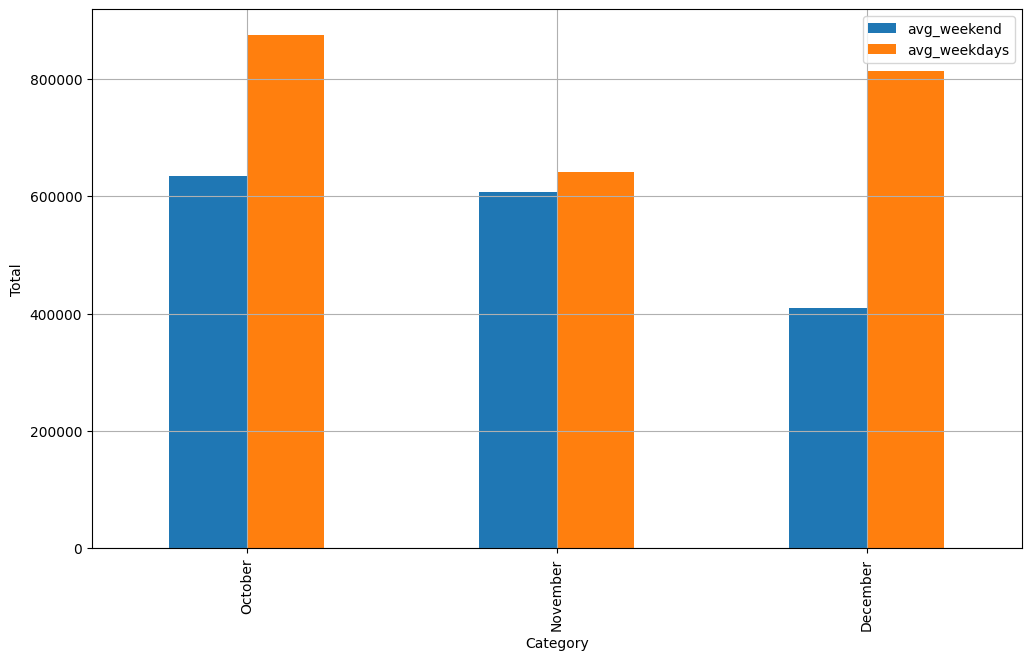

In [29]:
df_groupby_weekend.plot(x='month',
           y=['avg_weekend','avg_weekdays'],
           kind='bar',
           grid = True,
           xlabel = 'Category',
           ylabel = 'Total',
           figsize=(12,7),
           rot = 90,
           table = False,
           secondary_y = False)

1. The result show a consistent pattern of decline in weekend sales compared to weekdays throughout October to December. This indicates that the weekend campaign may not have provided a significant boost to sales.
The Biggest Discrepancy in December:

2. December was the month with the most significant decline, reaching 98%. This should be of particular interest in analysing and improving the weekend campaign strategy.

## Daily average sales weekends vs daily average sales weekdays for the whole 3 months ##

In [30]:
#saving data in the data frame
weekend_2022 = df[
    #filter data valid=1
    (df['is_valid'] == 1) &
    #filter data Saturday atau Sunday
    (df['day'].isin(['Saturday', 'Sunday'])) &
    #filter data in October, November or December 2022
    ((df['month'].isin(['October', 'November', 'December'])) &
     (df['year'] == 2022))
]


In [31]:
#saving data in the data frame
weekday_2022 = df[\
                  #filter data valid=1
                  (df['is_valid']== 1) &\
                  (df['day'].isin(['Monday','Tuesday','Wednesday','Thusday','Friday'])) &\
                  #filter data in October, November or December in 2022
                  ((df['month'].isin(['October', 'November', 'December'])) &
                  (df['year'] == 2022))
]

In [32]:
data21 = {\
          'Periode':'Total 3 months',\
          'Avg Weekend Sales': round(weekend_2022['before_discount'].mean(),2), \
          'Avg Weekdays Sales': round(weekday_2022['before_discount'].mean(),2),\
          'Diff (Value)': round(weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean(),2),\
          'Diff (%)': pd.Series(round(((weekend_2022['before_discount'].mean() - weekday_2022['before_discount'].mean())/weekend_2022['before_discount'].mean())*100,2), dtype=str)+'%'
          }
pd.DataFrame(data=data21, index=[0])

,Periode,Avg Weekend Sales,Avg Weekdays Sales,Diff (Value),Diff (%)
0,Total 3 months,558865.15,751972.85,-193107.7,-34.55%


1. To further understand the impact of the weekend campaign, it is necessary to segment customers who make purchases on weekends. Analysing their demographics, product preferences and shopping habits can help detail a more focused marketing strategy.

2. Conducting a more detailed product analysis on Saturday and Sunday can provide insights into the products that are most in demand over the weekend. This can help structure special offers or identify products that can be emphasised during weekend campaigns.

3. Study how external factors such as weather, special events or social trends affect weekend buying behaviour.